Simulating Continous Random Variables

In [ ]:
import pandas as pd


file_path = 'players_22.csv'

# Load the dataset into a Pandas DataFrame
footballplayers_dataset = pd.read_csv(file_path, low_memory=False)

# Check the columns present in the dataset
print(footballplayers_dataset.columns)

# Extract the 'bmi' column data
age_data = footballplayers_dataset['age']

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)


[19.59439203 25.9700113  29.53030665 29.90742456 24.94716003 24.85050269
 33.22056587 31.75624825 23.25686333 31.57009741 21.16629472 28.2874834
 31.26799885 23.63461374 27.49910588 24.34602024 19.76941302 23.18165713
 18.20436943 26.49368111 29.81502996 28.81973063 28.77860605 24.11072727
 27.75072922 26.35190936 21.27110742 31.70850481 23.09286481 23.38075389
 20.82374462 32.95306677 29.08064196 23.98667095 23.43006467 17.37337576
 32.17513168 22.14821167 33.46351693 31.47156743 24.15320689 30.0475052
 21.67773467 24.97334109 25.39896817 19.183864   24.59949258 28.02741355
 25.44513894 27.27884918 24.47204664 32.74710977 29.96082009 22.24699762
 21.31198051 23.09430924 26.14158643 30.84881241 18.56406647 33.59769798
 31.98833548 29.04934197 30.97503551 25.08001924 26.36027609 16.75200912
 28.76915122 23.38085093 24.99031485 24.53321322 29.72337551 26.24451116
 23.56080059 21.27688774 22.14213704 28.87889177 19.89662473 24.11997252
 28.23622051 28.47399606 28.84466231 21.91154508 18.6

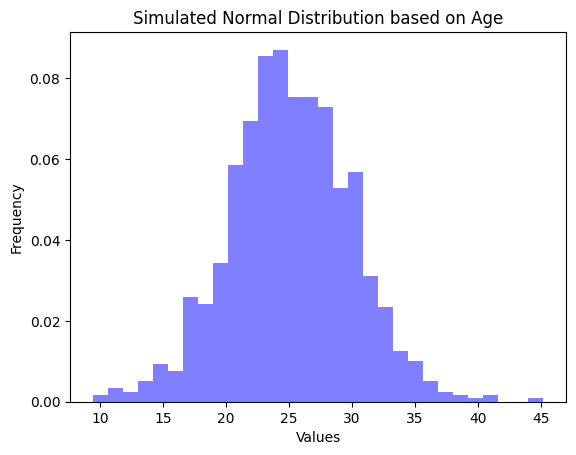

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Generate a normal distribution based on 'age' feature
mu = np.mean(age_data)  # Mean of the feature
sigma = np.std(age_data)  # Standard deviation of the feature

# Generate random data that follows a normal distribution
simulated_data = np.random.normal(mu, sigma, 1000)  # Generating 1000 data points


print(simulated_data)
plt.hist(simulated_data, bins=30, density=True, alpha=0.5, color='blue')
plt.title('Simulated Normal Distribution based on Age')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


Statistical Analysis

In [ ]:
import scipy.stats as st
mean = np.mean(age_data)
median = np.median(age_data)
std_deviation = np.std(age_data)
variance = np.var(age_data)
quantiles = np.percentile(age_data, [25, 50, 75])
kurt = st.kurtosis(age_data, axis=0, bias=True)

# Display the calculated statistics
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")
print(f"Quantiles (25th, 50th, 75th percentiles): {quantiles}")
print(f"Kurtosis: {kurt}")

Mean: 25.210821768283175
Median: 25.0
Standard Deviation: 4.748111844188541
Variance: 22.54456608492351
Quantiles (25th, 50th, 75th percentiles): [21. 25. 29.]
Kurtosis: -0.414032501091814


Visualization

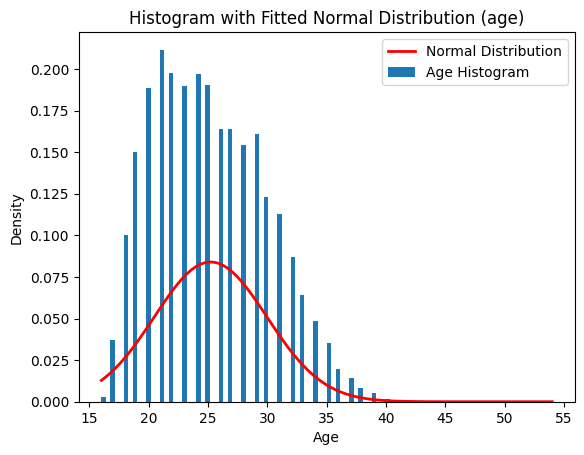

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extract age column
age_data = footballplayers_dataset['age']

mu = np.mean(age_data)
sigma = np.std(age_data)

count, bins, ignored = plt.hist(age_data, 100, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='red')

plt.title('Histogram with Fitted Normal Distribution (age)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(['Normal Distribution', 'Age Histogram'])

plt.show()

Central Limit Theorem Verification

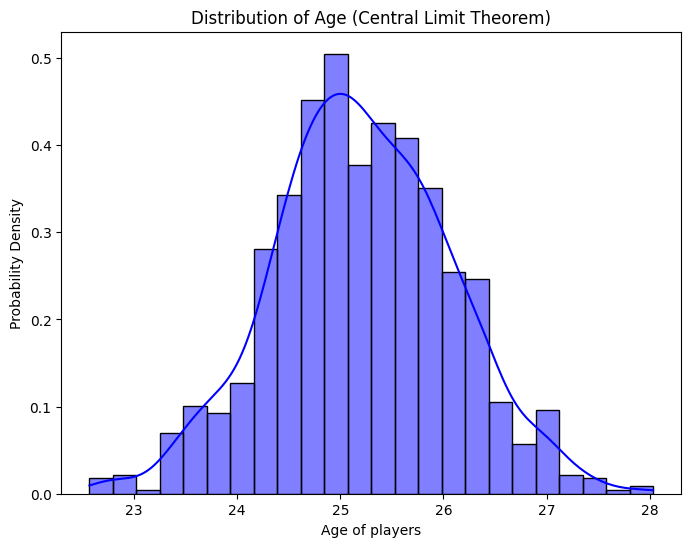

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



age_data = footballplayers_dataset['age']


def calculate_sample_means(sample_size, no_of_sample_means):
    mean_list = []
    for i in range(no_of_sample_means):
        sample = np.random.choice(age_data, sample_size)
        sample_mean = np.mean(sample)
        mean_list.append(sample_mean)
    return mean_list

# Calculate sample means for a sample size of 30, 1000 times
sample_means = calculate_sample_means(sample_size=30, no_of_sample_means=1000)


plt.figure(figsize=(8, 6))
sns.histplot(sample_means, color='blue', kde=True, stat="density")
plt.xlabel('Age of players')
plt.ylabel('Probability Density')
plt.title('Distribution of Age (Central Limit Theorem)')
plt.show()

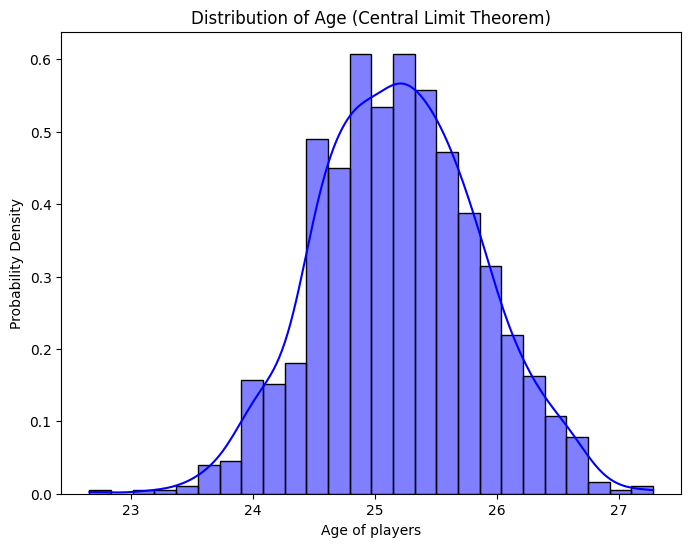

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


age_data = footballplayers_dataset['age']

def calculate_sample_means(sample_size, no_of_sample_means):
    mean_list = []
    for i in range(no_of_sample_means):
        sample = np.random.choice(age_data, sample_size)
        sample_mean = np.mean(sample)
        mean_list.append(sample_mean)
    return mean_list

# Calculate sample means for a sample size of 30, 1000 times
sample_means = calculate_sample_means(sample_size=50, no_of_sample_means=1000)

plt.figure(figsize=(8, 6))
sns.histplot(sample_means, color='blue', kde=True, stat="density")
plt.xlabel('Age of players')
plt.ylabel('Probability Density')
plt.title('Distribution of Age (Central Limit Theorem)')
plt.show()

Outlier Detection

<ipython-input-27-57a8a73b17ee>:6: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  footballplayers_dataset = pd.read_csv(file_path)


Outliers using IQR method:
388      43
3105     43
10042    42
12245    43
16209    54
16505    42
Name: age, dtype: int64

Outliers using z-scores method:
97       39
284      39
388      43
864      39
865      39
         ..
16538    39
17000    39
17034    40
17435    41
17720    40
Name: age, Length: 66, dtype: int64


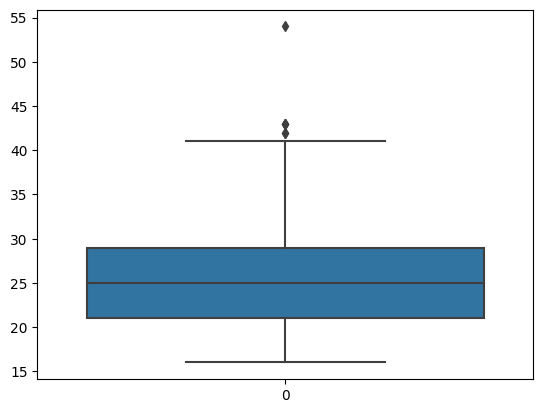

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

e_path = 'players_22.csv'  # Replace with your file path
footballplayers_dataset = pd.read_csv(file_path)

# Extract the column for outlier detection (e.g., 'SalePrice')
column_of_interest = 'age'  # Replace with your column name
data_column = footballplayers_dataset[column_of_interest]

# Visualization using a box plot
sns.boxplot(data_column)

# Detecting outliers using interquartile range (IQR)
q1 = np.quantile(data_column, 0.25)
q3 = np.quantile(data_column, 0.75)
IQR = q3 - q1
outliers_iqr = data_column[((data_column < (q1 - 1.5 * IQR)) | (data_column > (q3 + 1.5 * IQR)))]

# Detecting outliers using z-scores
mean = np.mean(data_column)
std_dev = np.std(data_column)
z_score = (data_column - mean) / std_dev
outliers_z_score = data_column[(z_score > 2.73) | (z_score < -2.73)]

print("Outliers using IQR method:")
print(outliers_iqr)

print("\nOutliers using z-scores method:")
print(outliers_z_score)

Probability Calculations


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

# Load the dataset into a Pandas DataFrame
file_path = 'players_22.csv'  # Replace with your file path
footballplayers_dataset = pd.read_csv(file_path, low_memory=False)

# Extract the column for outlier detection
column_of_interest = 'age'  # Replace with your column name
data_column = footballplayers_dataset[column_of_interest]

mu = np.mean(data_column)
sigma = np.std(data_column)

# Calculate the probability P(-0.2 < X < 0.1)
lower_bound = -0.2
upper_bound = 0.1
probability = st.norm.cdf((upper_bound - mu) / sigma) - st.norm.cdf((lower_bound - mu) / sigma)

print(f"The probability of -0.2 < X < 0.1 is: {probability:.4f}")
print(mu)
print(sigma)

The probability of -0.2 < X < 0.1 is: 0.0000
25.210821768283175
4.748111844188541


4.1.2 Simulating from Discrete Distributions:

In [ ]:
import pandas as pd
import scipy.stats as st
# Load the dataset into a Pandas DataFrame
file_path = 'players_22.csv' # Replace with your file path
footballplayers_dataset = pd.read_csv(file_path,  low_memory=False)
# Extract the column for simulating discrete random variables (e.g., 'Sal
column_of_interest = 'age' # Replace with your column name
data_column = footballplayers_dataset[column_of_interest]
# Calculate the mean of the column
mu = data_column.mean()
# Simulate discrete random variables using the Poisson distribution
data_discrete = st.poisson.rvs(mu, size=1000)
# Display the simulated data
print(data_discrete)


[27 29 19 21 34 21 19 20 32 32 24 26 26 27 24 26 27 20 28 28 29 22 29 19
 25 27 26 29 30 25 27 22 28 17 23 25 21 21 35 13 23 21 26 16 26 25 23 21
 26 28 25 37 20 28 27 39 16 22 28 28 28 26 21 21 20 28 26 27 30 28 25 33
 15 30 19 21 22 24 19 26 26 28 29 26 20 34 25 22 20 29 32 18 22 24 36 25
 23 21 36 27 19 18 33 29 23 32 21 27 22 26 35 32 25 15 28 20 21 28 24 25
 33 24 27 32 33 38 25 30 35 25 19 22 26 13 19 25 20 23 28 32 32 28 32 28
 17 24 30 30 24 17 28 18 20 29 26 33 20 32 21 29 28 24 27 17 30 34 31 22
 28 26 29 21 24 27 28 27 20 29 34 16 24 18 23 17 18 27 32 26 22 32 27 27
 25 22 28 25 31 28 21 21 24 31 29 24 36 28 25 31 27 20 23 26 23 30 27 28
 21 24 18 23 26 26 33 25 20 37 44 22 32 29 17 23 28 31 25 28 30 29 28 22
 23 30 28 29 31 28 26 26 32 27 27 17 27 23 29 26 30 22 25 22 27 27 30 20
 24 21 26 34 26 22 25 23 30 26 32 27 25 20 40 25 35 26 25 23 33 27 28 31
 16 28 25 21 24 23 24 24 28 22 18 25 30 26 28 27 23 23 33 23 21 26 37 26
 26 27 21 25 17 27 32 24 21 21 37 25 21 22 21 22 15

Statistical Analysis:

In [ ]:
import numpy as np
import seaborn as sns
import scipy.stats as st
mean = np.mean(data_column)
standard_deviation = np.std(data_column)
variance = np.var(data_column)
quantile = np.quantile(data_column, [0.25, 0.5, 0.75])
mode = st.mode(data_column,keepdims=True)
skewness = st.skew(data_column)
kurtosis = st.kurtosis(data_column)
# Print the calculated measures
print("Mean:", mean)
print("Standard Deviation:", standard_deviation)
print("Variance:", variance)
print("First Quantile:", quantile[0])
print("Median (Second Quantile):", quantile[1])
print("Third Quantile:", quantile[2])
print("Mode:", mode)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Mean: 25.210821768283175
Standard Deviation: 4.748111844188541
Variance: 22.54456608492351
First Quantile: 21.0
Median (Second Quantile): 25.0
Third Quantile: 29.0
Mode: ModeResult(mode=array([21]), count=array([1547]))
Skewness: 0.43114986285578466
Kurtosis: -0.414032501091814


Visualization:

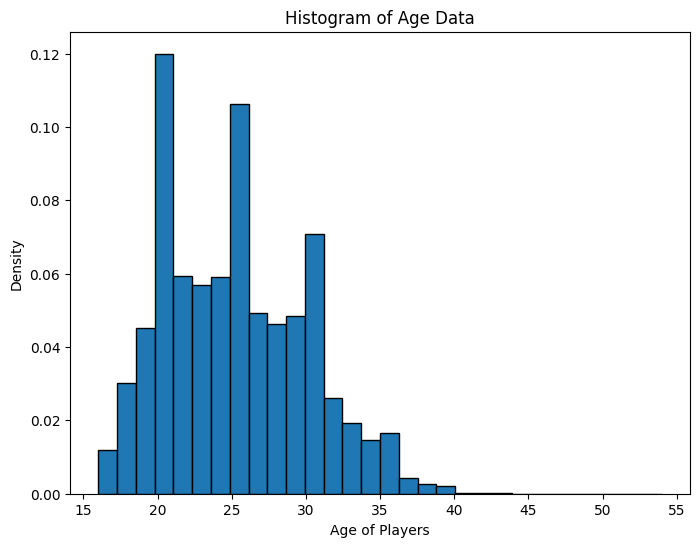

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(data_column, bins=30, density=True, edgecolor='black')
plt.title('Histogram of Age Data')
plt.xlabel('Age of Players')
plt.ylabel('Density')
plt.show()

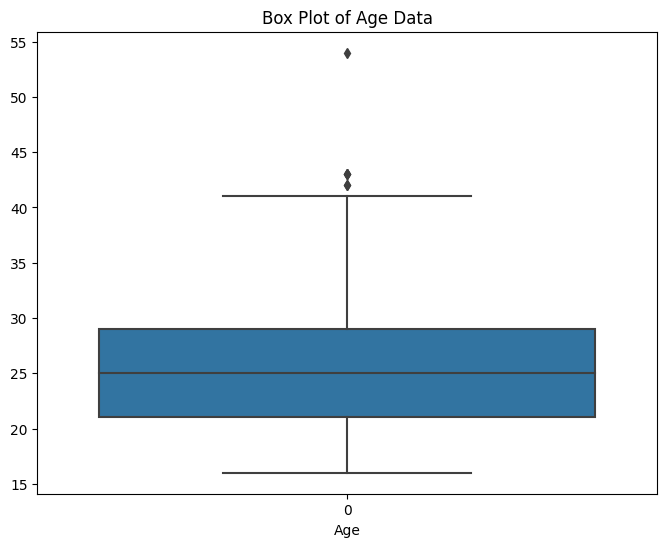

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(data_column)
plt.title('Box Plot of Age Data')
plt.xlabel('Age')
plt.show()

Centre Limit Verfication

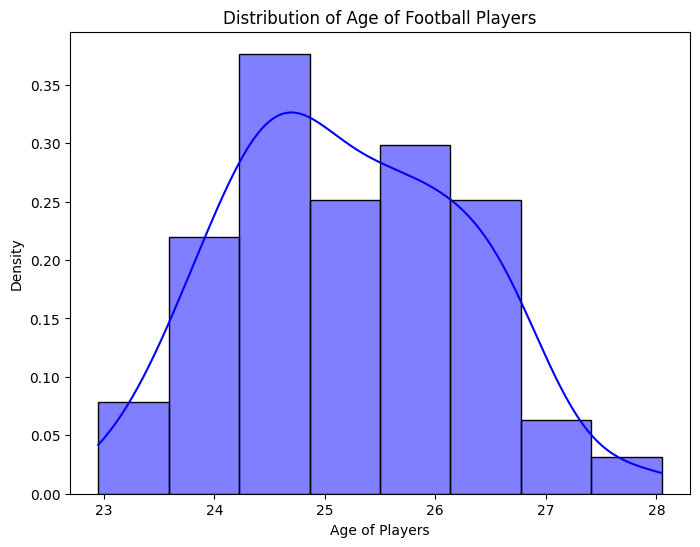

In [ ]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Assume 'data' represents your housing dataset column
data_column = footballplayers_dataset['age'] # Replace with your column name
mean_list = []
def calc_sample_mean(sample_size, no_of_sample_means):
  for i in range(no_of_sample_means):
    sample = random.sample(list(data_column), sample_size)
    sample_mean = np.mean(sample)
    mean_list.append(sample_mean)
  return mean_list
mean_samples = calc_sample_mean(sample_size=20, no_of_sample_means=100)

# Visualize sample means distribution
plt.figure(figsize=(8, 6))
sns.histplot(mean_samples, color='blue', kde=True, stat="density")
plt.xlabel('Age of Players')
plt.title('Distribution of Age of Football Players')
plt.show()

Outliers detection

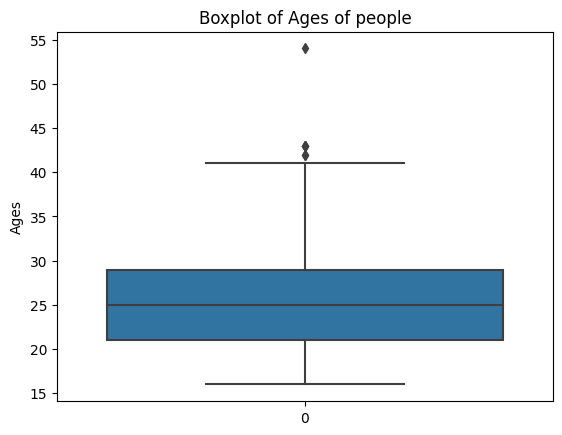

Outliers using IQR method:
388      43
3105     43
10042    42
12245    43
16209    54
16505    42
Name: age, dtype: int64

Outliers using z-scores method:
97       39
284      39
388      43
864      39
865      39
         ..
16538    39
17000    39
17034    40
17435    41
17720    40
Name: age, Length: 66, dtype: int64


In [ ]:
import seaborn as sns
import numpy as np

# Assume 'data_column' represents your football players dataset column
data_column = footballplayers_dataset['age'] # Replace with your column name

# Visualization using a box plot
sns.boxplot(data_column)
plt.title('Boxplot of Ages of people')
plt.ylabel('Ages')
plt.show()

# Detecting outliers using interquartile range (IQR)
q1 = np.quantile(data_column, 0.25)
q3 = np.quantile(data_column, 0.75)
IQR = q3 - q1
outliers = data_column[((data_column < (q1 - 1.5 * IQR)) | (data_column > (q3 + 1.5 * IQR)))]

print("Outliers using IQR method:")
print(outliers)

# Detecting outliers using z-scores
mean = np.mean(data_column)
standard_deviation = np.std(data_column)
upper_limit = mean + 2.73 * standard_deviation
lower_limit = mean - 2.73 * standard_deviation
outliers_z_scores = data_column[((data_column > upper_limit) | (data_column < lower_limit) )]

print("\nOutliers using z-scores method:")
print(outliers_z_scores)

Probability calculation

In [ ]:
import scipy.stats as st

# Assume 'data_column' represents your housing dataset column
data_column = footballplayers_dataset['age'] # Replace with your column name

# P(X=1) for the Poisson distribution
prob_X_equals_1 = st.poisson.pmf(k=1, mu=3)
print(f"P(X=1) Probability: {prob_X_equals_1}")
# P(X<=1) for the Poisson distribution
prob_X_less_than_equal_1 = st.poisson.cdf(k=1, mu=3)
print(f"P(X<=1) Probability: {prob_X_less_than_equal_1}")
# P(X>=1) for the Poisson distribution
prob_X_greater_than_equal_1 = 1 - st.poisson.cdf(k=1, mu=3)
print(f"P(X>=1) Probability: {prob_X_greater_than_equal_1}")

P(X=1) Probability: 0.14936120510359185
P(X<=1) Probability: 0.1991482734714558
P(X>=1) Probability: 0.8008517265285442
